- A collection of analyses on models **not fine-tuned** for the stacking dataset.

In [63]:
import torch
from utils import (
    align_chunks,
    reduce_chunks_dim,
    compute_frames_chunks_differences
)

from datasets import load_dataset
import matplotlib.pyplot as plt

# SmolVLA

In [64]:
dataset_id = "fracapuano/smolvla_stacking_action_chunks"

In [65]:
dataset = load_dataset(dataset_id, split="train").with_format("torch")

chunks_differences, frames_diffs = compute_frames_chunks_differences(dataset, n_chunk_in_pairs=2)

100%|██████████| 1599/1599 [03:42<00:00,  7.17it/s]


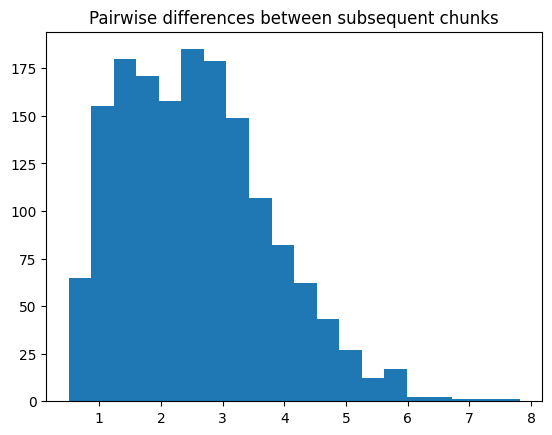

In [66]:
fig, ax = plt.subplots()
ax.hist(chunks_differences, bins=20)

ax.set_title("Pairwise differences between subsequent chunks")
plt.show()

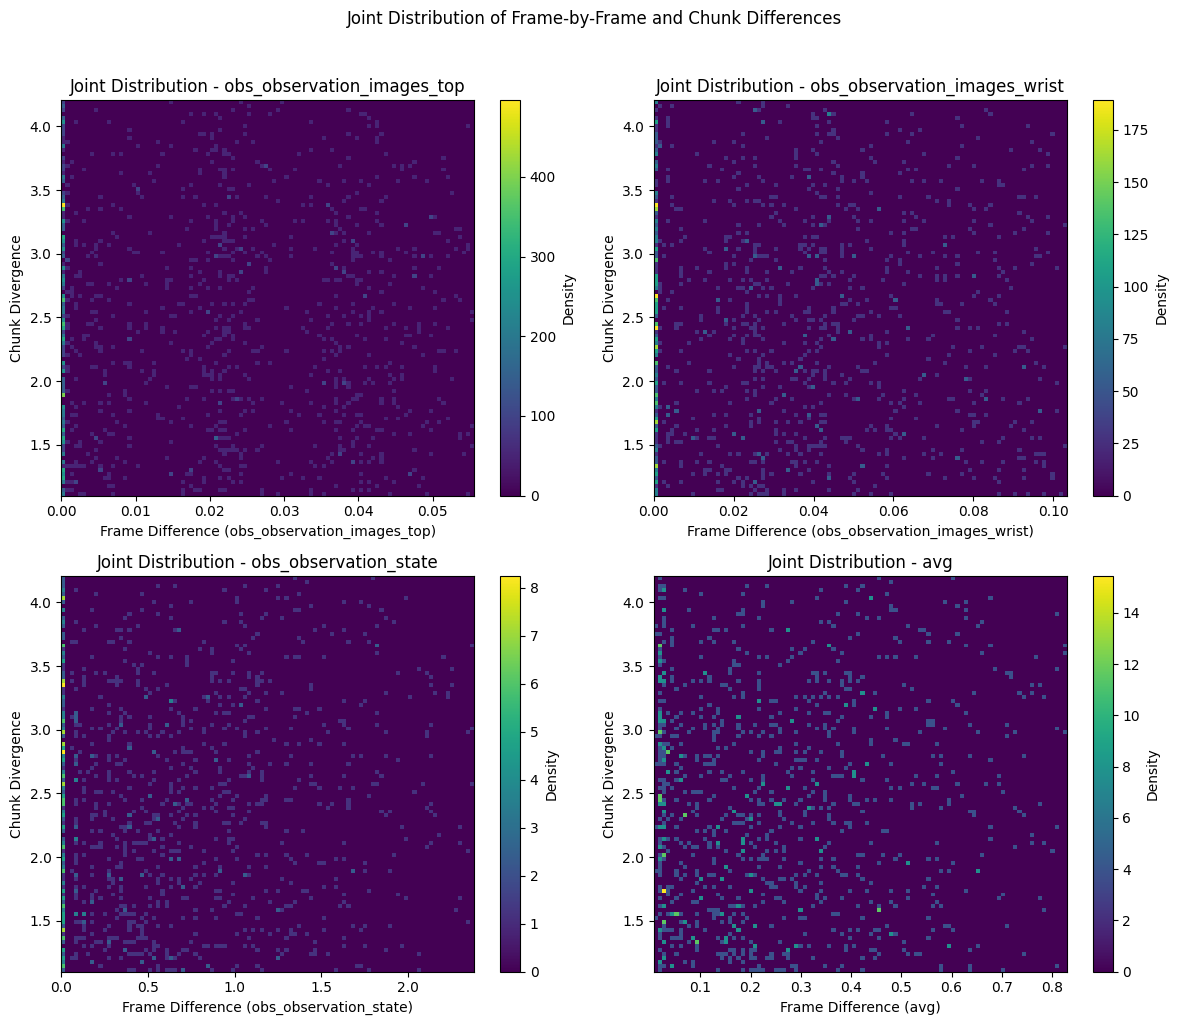

In [67]:
from utils import perceptual_keys, vector_keys
import numpy as np

keys = [*perceptual_keys, *vector_keys, "avg"]
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

for i in range(4):
    current = ax[i//2, i%2]
    
    x = np.array([fd[keys[i]] for fd in frames_diffs])
    y = chunks_differences.numpy()
    
    # Calculate percentile bounds
    x_lower, x_upper = np.percentile(x, [10, 90])
    y_lower, y_upper = np.percentile(y, [10, 90])
    
    # Filter data within the percentile bounds
    mask = (x >= x_lower) & (x <= x_upper) & (y >= y_lower) & (y <= y_upper)
    x = x[mask]
    y = y[mask]
    
    # Create 2D histogram
    h = current.hist2d(
        x, y,
        bins=100,
        density=True  # This normalizes the histogram
    )
    
    # Add colorbar
    plt.colorbar(h[3], ax=current, label='Density')
    
    current.set_xlabel(f'Frame Difference ({keys[i]})')
    current.set_ylabel('Chunk Divergence')
    current.set_title(f'Joint Distribution - {keys[i]}')

fig.suptitle('Joint Distribution of Frame-by-Frame and Chunk Differences', y=1.02)
plt.tight_layout()

In [68]:
avg_distance = torch.tensor([fd[keys[i]] for fd in frames_diffs])
torch.corrcoef(torch.vstack((avg_distance, chunks_differences)))[0,1].item()

0.04186997562646866

In [69]:
pca = reduce_chunks_dim(dataset)

1D projection of action chunk explains variance:  [0.78443235]


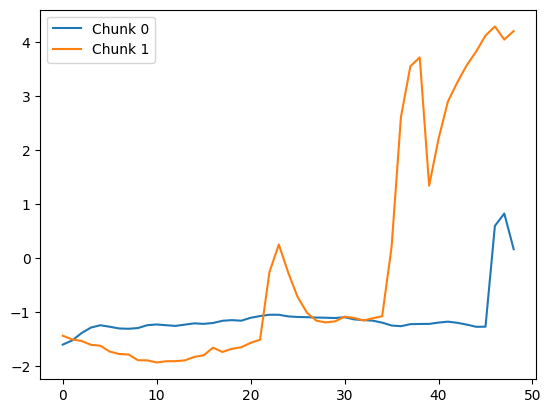

In [70]:
import torch
idx = torch.median(chunks_differences, 0).indices.item()

chunks = dataset[idx:idx+2]["action_chunks"]

aligned_chunks = align_chunks(chunks)
reduced_dim_chunks = [pca.transform(aligned_chunks[i]) for i in range(len(aligned_chunks))]

for i in range(len(reduced_dim_chunks)):
    plt.plot(reduced_dim_chunks[i], label=f"Chunk {i}")

plt.legend()
plt.show()

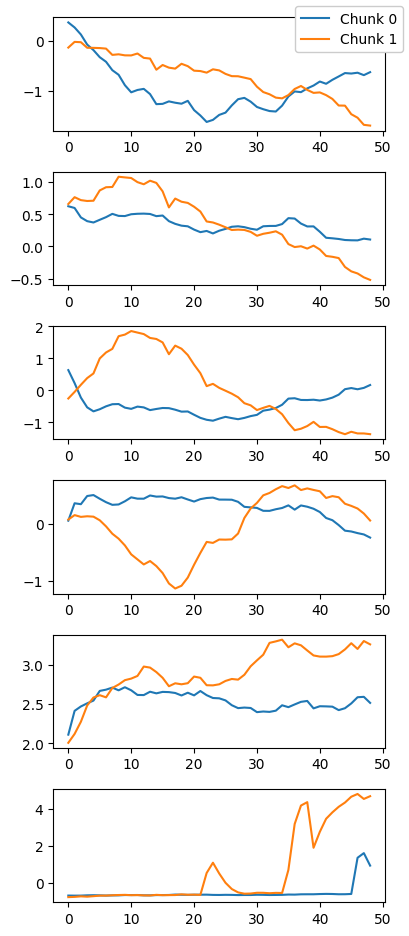

In [71]:
fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(4,10))

for chunk_idx, chunk in enumerate(aligned_chunks):
    for i in range(6):
        current = ax[i]
        
        if i != 5:
            current.plot(chunk[:, i])
        else:
            current.plot(chunk[:, i], label = f"Chunk {chunk_idx}")
        

# Add legend below all subplots
fig.legend(framealpha=1)

# Adjust layout to prevent overlap, leaving space for legend
plt.tight_layout()
plt.subplots_adjust(bottom=0.1)

# PI0

In [72]:
dataset_id = "fracapuano/pi0_stacking_action_chunks"

In [73]:
import matplotlib.pyplot as plt
dataset = load_dataset(dataset_id, split="train").with_format("torch")

chunks_differences, frames_diffs = compute_frames_chunks_differences(dataset, n_chunk_in_pairs=2)

100%|██████████| 1599/1599 [03:54<00:00,  6.81it/s]


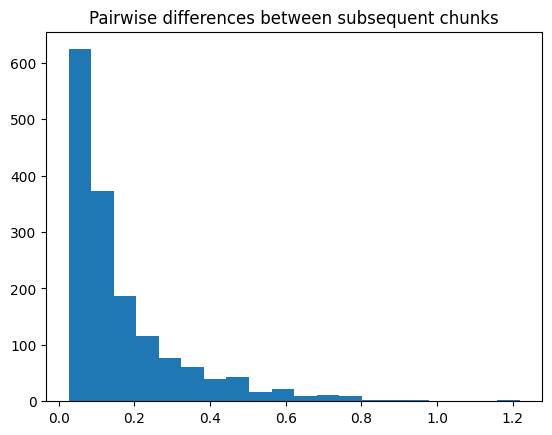

In [74]:
fig, ax = plt.subplots()
ax.hist(chunks_differences, bins=20)

ax.set_title("Pairwise differences between subsequent chunks")
plt.show()

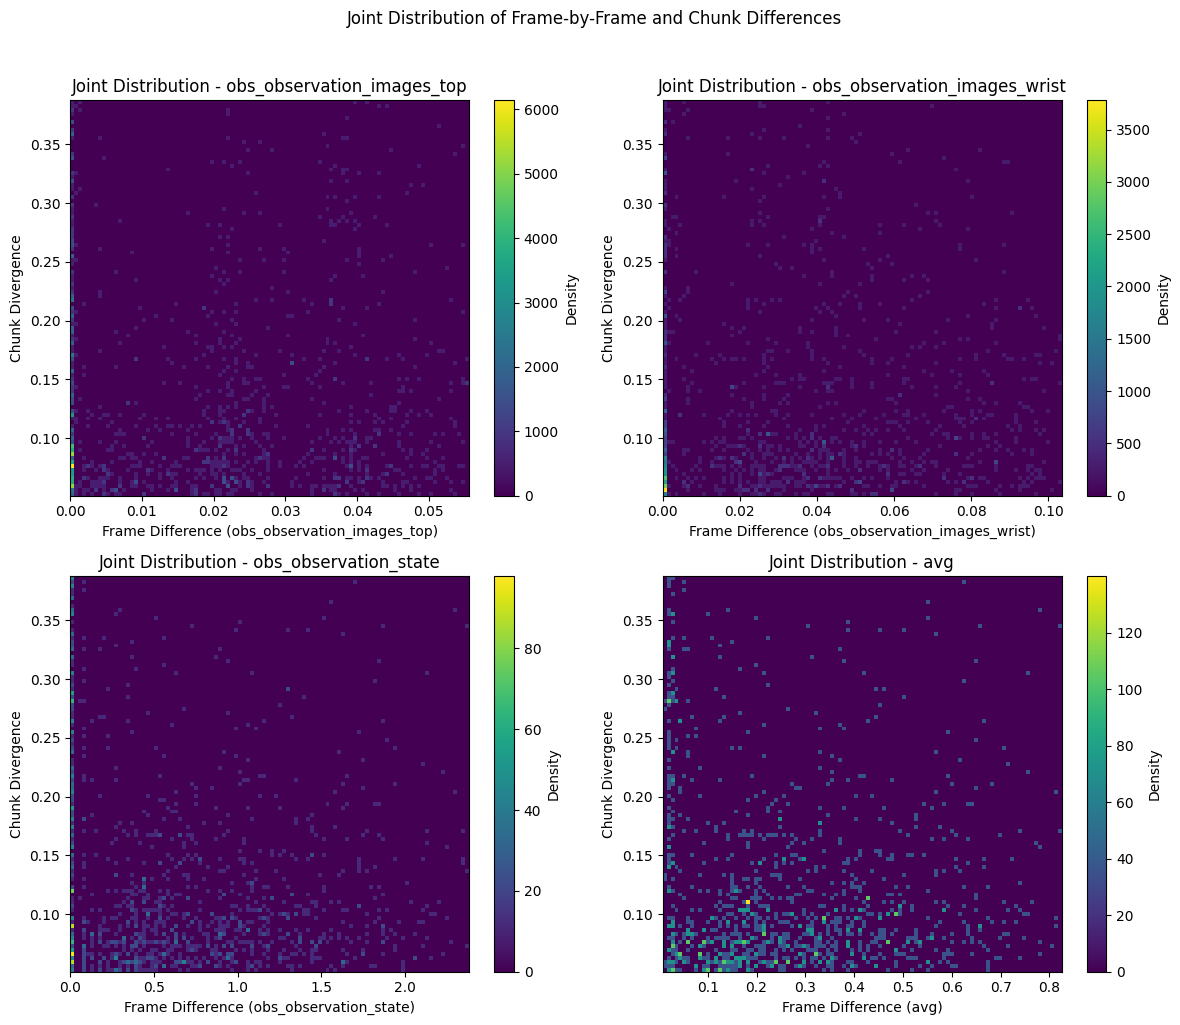

In [75]:
from utils import perceptual_keys, vector_keys
import numpy as np

keys = [*perceptual_keys, *vector_keys, "avg"]
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

for i in range(4):
    current = ax[i//2, i%2]
    
    x = np.array([fd[keys[i]] for fd in frames_diffs])
    y = chunks_differences.numpy()
    
    # Calculate percentile bounds
    x_lower, x_upper = np.percentile(x, [10, 90])
    y_lower, y_upper = np.percentile(y, [10, 90])
    
    # Filter data within the percentile bounds
    mask = (x >= x_lower) & (x <= x_upper) & (y >= y_lower) & (y <= y_upper)
    x = x[mask]
    y = y[mask]
    
    # Create 2D histogram
    h = current.hist2d(
        x, y,
        bins=100,
        density=True  # This normalizes the histogram
    )
    
    # Add colorbar
    plt.colorbar(h[3], ax=current, label='Density')
    
    current.set_xlabel(f'Frame Difference ({keys[i]})')
    current.set_ylabel('Chunk Divergence')
    current.set_title(f'Joint Distribution - {keys[i]}')

fig.suptitle('Joint Distribution of Frame-by-Frame and Chunk Differences', y=1.02)
plt.tight_layout()

In [76]:
avg_distance = torch.tensor([fd[keys[i]] for fd in frames_diffs])

torch.corrcoef(torch.vstack((avg_distance, chunks_differences)))[0,1].item()

0.038947418332099915

In [77]:
pca = reduce_chunks_dim(dataset)

1D projection of action chunk explains variance:  [0.65948206]


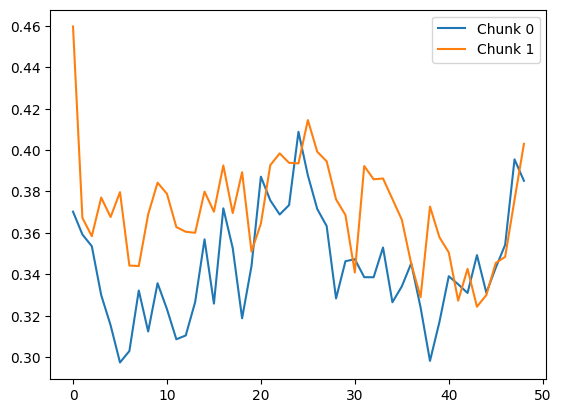

In [78]:
import torch
idx = torch.median(chunks_differences, 0).indices.item()

chunks = dataset[idx:idx+2]["action_chunks"]

aligned_chunks = align_chunks(chunks)
reduced_dim_chunks = [pca.transform(aligned_chunks[i]) for i in range(len(aligned_chunks))]

for i in range(len(reduced_dim_chunks)):
    plt.plot(reduced_dim_chunks[i], label=f"Chunk {i}")

plt.legend()
plt.show()

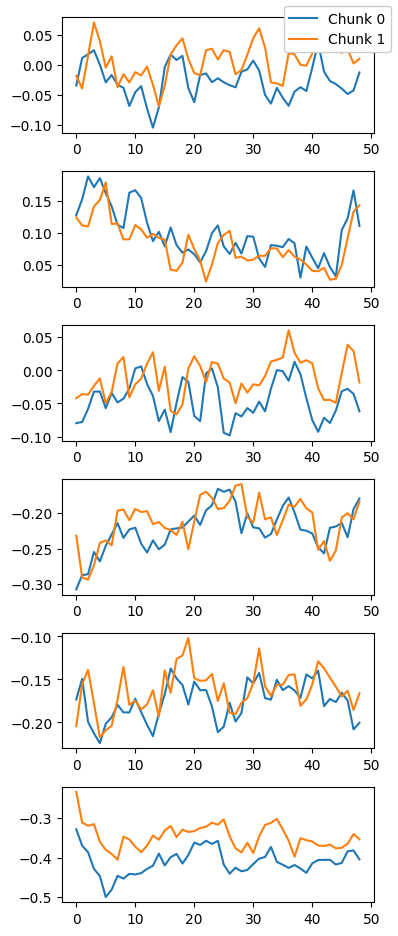

In [79]:
fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(4,10))

for chunk_idx, chunk in enumerate(aligned_chunks):
    for i in range(6):
        current = ax[i]
        
        if i != 5:
            current.plot(chunk[:, i])
        else:
            current.plot(chunk[:, i], label = f"Chunk {chunk_idx}")
        

# Add legend below all subplots
fig.legend(framealpha=1)

# Adjust layout to prevent overlap, leaving space for legend
plt.tight_layout()
plt.subplots_adjust(bottom=0.1)